In [ ]:
from fastai.data.all import *
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.FOOD)

In [ ]:
path.ls()

(#8) [Path('/home/nex/.fastai/data/food-101/test.json'),Path('/home/nex/.fastai/data/food-101/h5'),Path('/home/nex/.fastai/data/food-101/train.json'),Path('/home/nex/.fastai/data/food-101/test.txt'),Path('/home/nex/.fastai/data/food-101/classes.txt'),Path('/home/nex/.fastai/data/food-101/labels.txt'),Path('/home/nex/.fastai/data/food-101/train.txt'),Path('/home/nex/.fastai/data/food-101/images')]

In [ ]:
fnames = get_image_files(path/"images")

In [ ]:
fnames[0]

Path('/home/nex/.fastai/data/food-101/images/gnocchi/3229631.jpg')

In [ ]:
dblock = DataBlock()

In [ ]:
dsets = dblock.datasets(fnames)
dsets.train[0]

(Path('/home/nex/.fastai/data/food-101/images/french_toast/526116.jpg'),
 Path('/home/nex/.fastai/data/food-101/images/french_toast/526116.jpg'))

In [ ]:
dblock = DataBlock(get_items = get_image_files)

In [ ]:
dsets = dblock.datasets(path/"images")
dsets.train[0]

(Path('/home/nex/.fastai/data/food-101/images/peking_duck/3923700.jpg'),
 Path('/home/nex/.fastai/data/food-101/images/peking_duck/3923700.jpg'))

In [ ]:
files = get_image_files(path/"images")

In [ ]:
def label_func(x): return x.parent.name

In [ ]:
dls = ImageDataLoaders.from_path_func(path, files, label_func, item_tfms=Resize(224))

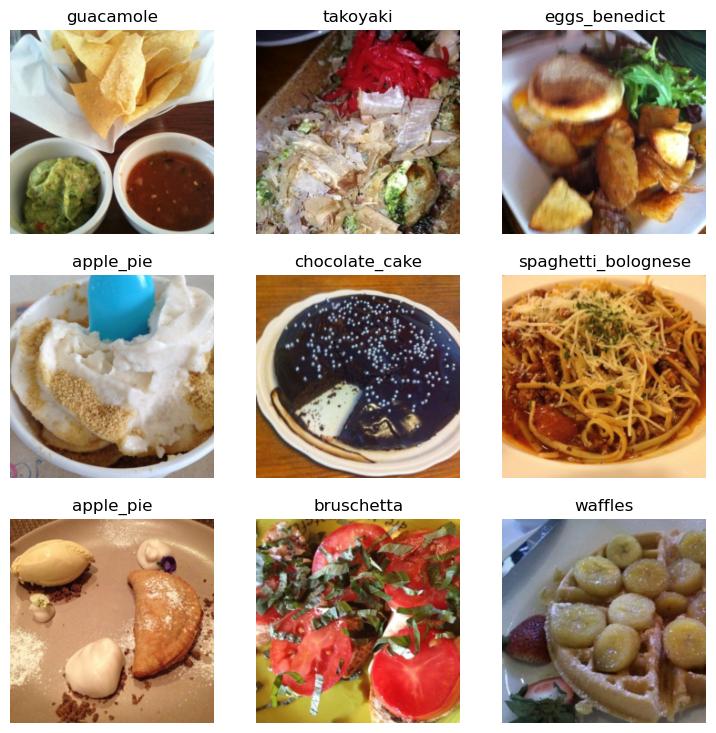

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/home/nex/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nex/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.export("food.pkl")

In [ ]:
learn = load_learner(path/"food.pkl")

In [ ]:
learn.predict

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

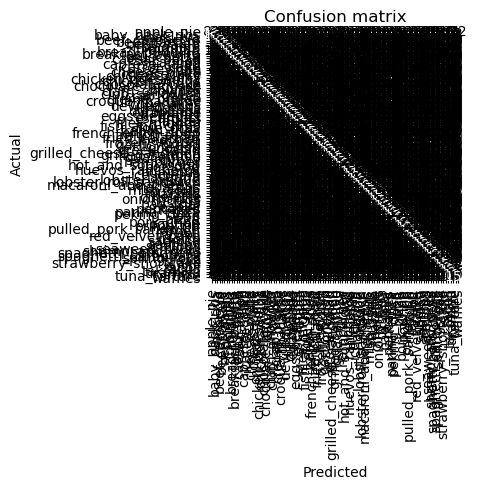

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
dls.__dict__

{'loaders': [<fastai.data.core.TfmdDL>,
  <fastai.data.core.TfmdDL>],
 'path': Path('/home/nex/.fastai/data/food-101'),
 '_device': device(type='cuda', index=0)}

In [ ]:
len(
dls[0])

1262

In [ ]:
vectorized_label_func = np.vectorize(label_func)

In [ ]:
target = vectorized_label_func(files)

In [ ]:
target[0]

'gnocchi'

In [ ]:
set(target)

{'apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

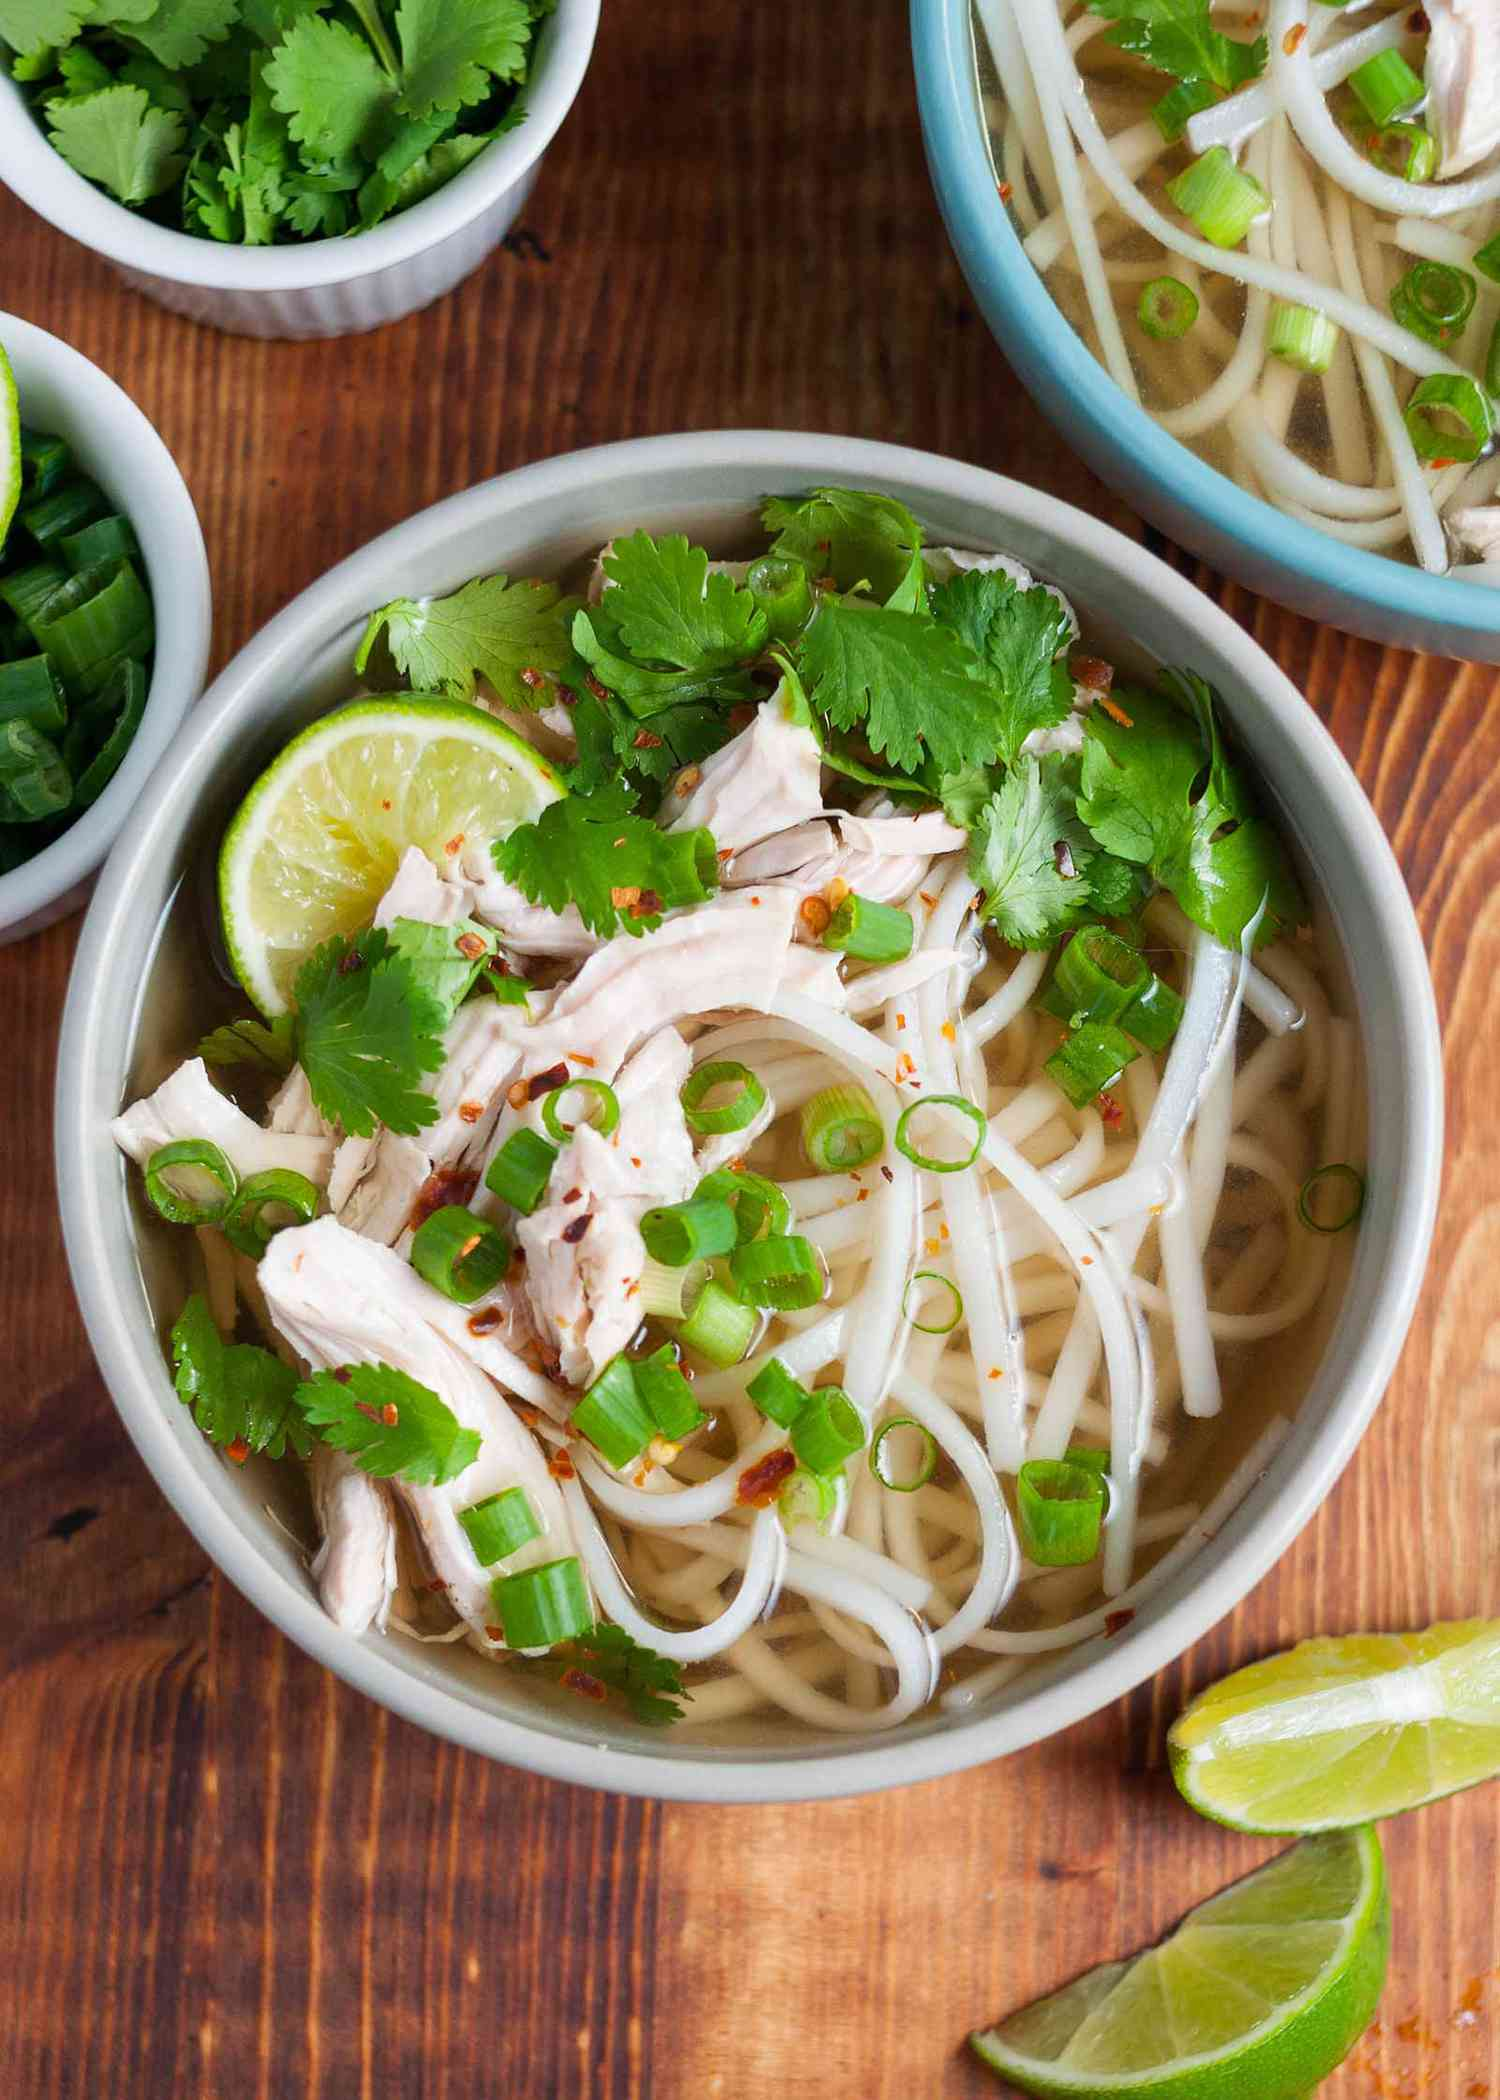

In [ ]:
import PIL

img = PIL.Image.open('/home/nex/media/img/pho.jpg')
img

In [ ]:
learn.predict(img)

('pho',
 tensor(75),
 tensor([8.0593e-11, 1.2249e-07, 5.0534e-08, 3.6675e-07, 2.2292e-09, 2.1927e-06,
         1.1931e-07, 4.6250e-04, 7.1987e-10, 1.1638e-08, 1.7454e-09, 2.4624e-05,
         3.9445e-09, 1.6682e-07, 4.8171e-09, 9.0446e-07, 7.9538e-09, 6.1821e-09,
         1.6068e-06, 1.9264e-07, 2.7142e-07, 7.1397e-08, 8.1690e-08, 4.7608e-08,
         1.0927e-06, 5.5779e-08, 7.1498e-08, 5.3970e-09, 1.3523e-08, 2.5367e-08,
         1.5654e-07, 2.2391e-09, 1.9646e-05, 2.0398e-06, 1.4668e-08, 1.6162e-06,
         3.2057e-07, 1.2770e-07, 1.1054e-07, 8.5345e-09, 3.1078e-08, 2.9864e-07,
         2.1283e-10, 3.7725e-07, 1.3765e-06, 1.4583e-05, 2.9866e-09, 2.0374e-07,
         1.1293e-05, 4.3882e-09, 1.1176e-07, 8.6953e-06, 3.3973e-07, 2.0137e-08,
         4.4330e-05, 2.5216e-08, 1.7591e-07, 4.3509e-07, 2.2624e-06, 2.7511e-08,
         8.2978e-08, 1.2301e-07, 2.2200e-07, 3.5292e-08, 3.1368e-04, 7.2858e-07,
         6.0585e-07, 5.4984e-08, 2.8869e-08, 1.9922e-07, 6.3993e-05, 1.4429e-07,
       